   square_feet  price
0          150   6450
1          200   7450
2          250   8450
3          300   9450
4          350  11450
5          400  15450
6          600  18450
[8635.02659574]
[8635.02659574]


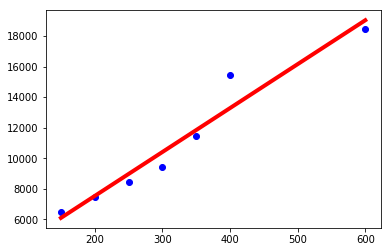

In [8]:
import pandas as pd
from io import StringIO

from sklearn import linear_model

import matplotlib.pyplot as plt



# 房屋面积与价格历史数据(csv文件)
csv_data = 'square_feet,price\n150,6450\n200,7450\n250,8450\n300,9450\n350,11450\n400,15450\n600,18450\n'

# 读入dataframe
df = pd.read_csv(StringIO(csv_data))
print(df)


# 建立线性回归模型
regr = linear_model.LinearRegression()

# 拟合
#regr.fit(df['square_feet'].reshape(-1, 1), df['price']) # 注意此处.reshape(-1, 1)，因为X是一维的！
regr.fit(df['square_feet'].values.reshape(-1, 1), df['price']) # 注意此处.reshape(-1, 1)，因为X是一维的！
# 不难得到直线的斜率、截距
a, b = regr.coef_, regr.intercept_

# 给出待预测面积
area = 238.5

# 方式1：根据直线方程计算的价格
print(a * area + b)

# 方式2：根据predict方法预测的价格
print(regr.predict(area))

# 画图
# 1.真实的点
plt.scatter(df['square_feet'], df['price'], color='blue')

# 2.拟合的直线
plt.plot(df['square_feet'], regr.predict(df['square_feet'].values.reshape(-1,1)), color='red', linewidth=4)

plt.show()

330.0904054545455
[330.09040545]


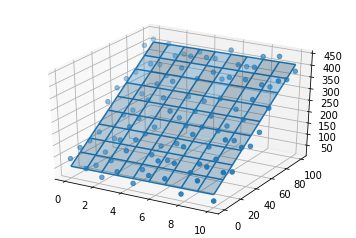

In [9]:
import numpy as np

from sklearn import linear_model

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


xx, yy = np.meshgrid(np.linspace(0,10,10), np.linspace(0,100,10))
zz = 1.0 * xx + 3.5 * yy + np.random.randint(0,100,(10,10))

# 构建成特征、值的形式
X, Z = np.column_stack((xx.flatten(),yy.flatten())), zz.flatten()

# 建立线性回归模型
regr = linear_model.LinearRegression()

# 拟合
regr.fit(X, Z)


# 不难得到平面的系数、截距
a, b = regr.coef_, regr.intercept_

# 给出待预测的一个特征
x = np.array([[5.8, 78.3]])

# 方式1：根据线性方程计算待预测的特征x对应的值z（注意：np.sum）
print(np.sum(a * x) + b)

# 方式2：根据predict方法预测的值z
print(regr.predict(x))


# 画图
fig = plt.figure()
ax = fig.gca(projection='3d')

# 1.画出真实的点
ax.scatter(xx, yy, zz)

# 2.画出拟合的平面
ax.plot_wireframe(xx, yy, regr.predict(X).reshape(10,10))
ax.plot_surface(xx, yy, regr.predict(X).reshape(10,10), alpha=0.3)


plt.show()